In [1]:
print('success')

success


In [2]:
import numpy as np
import matplotlib as mplt
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
print(keras.__version__)
print(tf.__version__)

2.4.0
2.4.1


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(x_train_full,y_train_full) , (x_test,y_test) = fashion_mnist.load_data()

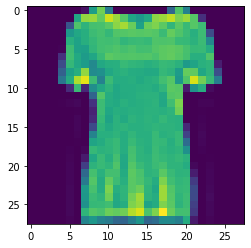

In [7]:
plt.imshow(x_train_full[10])

In [8]:
y_train_full[10]

0

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train_full[10]]

'T-shirt/top'

# Normilizing the data

In [11]:
x_train_n = x_train_full/255.

In [12]:
x_test_n = x_test/255.

In [13]:
x_valid , x_train = x_train_n[:5000],x_train_n[5000:]
y_valid , y_train = y_train_full[:5000],y_train_full[5000:]
x_test = x_train_n

# declaring random values for inital weights

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

# Creating the model

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
weights , bise = model.layers[1].get_weights()

In [18]:
weights.shape

(784, 300)

In [19]:
bise

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
bise.shape

(300,)

# Compiling the model

In [21]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


# Fiting the model

In [22]:
model_history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))


Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 1.0187 - accuracy: 0.6805 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5027 - accuracy: 0.8262 - val_loss: 0.4348 - val_accuracy: 0.8534
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4484 - accuracy: 0.8426 - val_loss: 0.5347 - val_accuracy: 0.7982
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4208 - accuracy: 0.8526 - val_loss: 0.3917 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4062 - accuracy: 0.8583 - val_loss: 0.3744 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3754 - accuracy: 0.8672 - val_loss: 0.3707 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3653 - accuracy: 0.8709 - val_loss: 0.3612 - val_accuracy:

In [23]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [24]:
model_history.history

{'loss': [0.7237026691436768,
  0.48419225215911865,
  0.4391198754310608,
  0.41227152943611145,
  0.39399123191833496,
  0.3752003610134125,
  0.3632165193557739,
  0.3516635298728943,
  0.3413761854171753,
  0.3319443464279175,
  0.3239230215549469,
  0.31479373574256897,
  0.3079524636268616,
  0.3021050691604614,
  0.29448434710502625,
  0.28899240493774414,
  0.2838404178619385,
  0.2777338922023773,
  0.27274635434150696,
  0.26731595396995544,
  0.2623072564601898,
  0.25757795572280884,
  0.2533426284790039,
  0.24854010343551636,
  0.24433575570583344,
  0.2404635101556778,
  0.2362230122089386,
  0.23282670974731445,
  0.2284305989742279,
  0.22501768171787262],
 'accuracy': [0.7643091082572937,
  0.831709086894989,
  0.8456000089645386,
  0.856145441532135,
  0.8619636297225952,
  0.8676727414131165,
  0.8714545369148254,
  0.8747090697288513,
  0.8790909051895142,
  0.882381796836853,
  0.8840181827545166,
  0.8865272998809814,
  0.8894000053405762,
  0.8918181657791138,
 

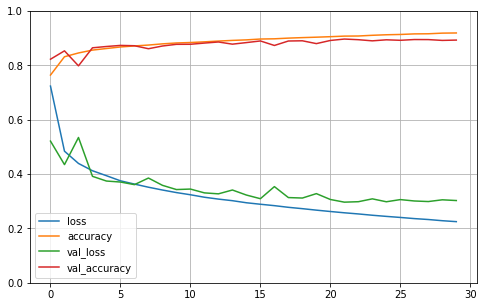

In [25]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [26]:
x_new = x_test[:3]

# Predecting 

In [27]:
pred  = model.predict(x_new)

In [30]:
pred.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.59, 0.04, 0.02, 0.23, 0.03, 0.  , 0.09, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [31]:
y_pred = model.predict_classes(x_new)

C:\Users\PRADEEP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [32]:
y_pred

array([9, 0, 0], dtype=int64)

In [33]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'T-shirt/top', 'T-shirt/top'], dtype='<U11')

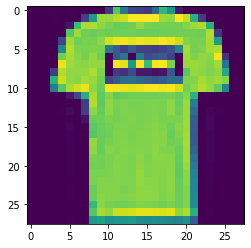

In [34]:
plt.imshow(x_new[1])

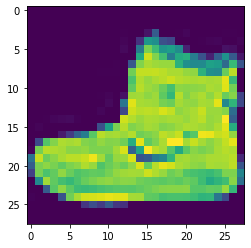

In [35]:
plt.imshow(x_new[0])

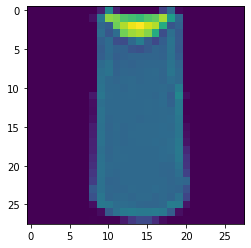

In [36]:
plt.imshow(x_new[2])